In [7]:
import pandas as pd
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50,preprocess_input
import cv2
import matplotlib.pyplot as plt
from keras import backend as K
%matplotlib inline

### Creating a Image Generator where we are scaling the images and performing data augmentation techniques like flipping, zoom and calling preprocessing function with processing the image in the format that is accepted by Resnet50

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,shear_range=0.2,zoom_range=0.2,
                                  validation_split=0.2,preprocessing_function=preprocess_input)

### Loading the images from Directories with Batch Size of 32 and Target size of (224,224) 

In [9]:
train_generator = train_datagen.flow_from_directory('../input/v2-plant-seedlings-dataset/nonsegmentedv2/',batch_size=32,target_size = (224,224),class_mode='categorical',subset='training')
test_generator = train_datagen.flow_from_directory('../input/v2-plant-seedlings-dataset/nonsegmentedv2/',batch_size=32,target_size = (224,224),class_mode='categorical',subset='validation')

Found 4437 images belonging to 12 classes.
Found 1102 images belonging to 12 classes.


## Loading the Resnet50 model without fully connected model.

In [10]:
K.set_learning_phase(0)
base_model = ResNet50(weights = 'imagenet',include_top = False,input_shape = (224,224,3),pooling='avg')
K.set_learning_phase(1)

94658560/94653016 [==============================] - 1s 0us/step


## Creating the model with connection of Fully connected for out custom dataset and loss function as categorical cross entropy and optimizer as adam.

In [11]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [12]:
history = model.fit_generator(train_generator,steps_per_epoch=1000,epochs = 3,validation_data=test_generator,validation_steps=64)

Epoch 1/3
1000/1000 [==============================] - 645s 645ms/step - loss: 1.4460 - acc: 0.6779 - val_loss: 1.1372 - val_acc: 0.7227
Epoch 2/3
1000/1000 [==============================] - 607s 607ms/step - loss: 0.7984 - acc: 0.8084 - val_loss: 0.5112 - val_acc: 0.8186
Epoch 3/3
1000/1000 [==============================] - 606s 606ms/step - loss: 0.2829 - acc: 0.8939 - val_loss: 0.4038 - val_acc: 0.8752


In [13]:
values = history.history

In [14]:
val_loss = values['val_loss']
val_acc = values['val_acc']
loss = values['loss']
acc = values['acc']
epochs = range(3)

## Plotting Training and Validation Loss of the trained model

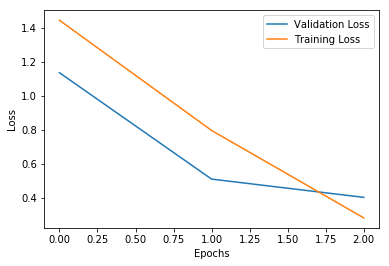

In [15]:
plt.plot(epochs,val_loss,label = 'Validation Loss')
plt.plot(epochs,loss,label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Training and Validation Accuracy of the trained model

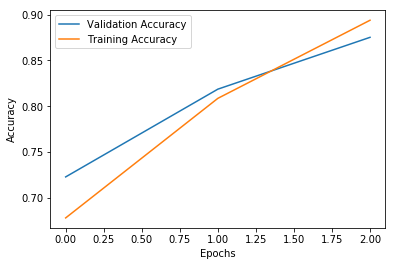

In [16]:
plt.plot(epochs,val_acc,label = 'Validation Accuracy')
plt.plot(epochs,acc,label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()